<a href="https://colab.research.google.com/github/halemitch/SQL/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [1]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('superhero_db.sqlite')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


In [20]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT NOT NULL
)
''')

print("heroes table created!")

cursor.execute('''
CREATE TABLE IF NOT EXISTS villans (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL PRIMARY KEY,
    evil_plan TEXT NOT NULL
)
''')

print("villians table created!")

cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villian_id INTEGER,
    outcome TEXT NOT NULL
)
''')

print("heroes table created!")

# Close the cursor
#cursor.close()

# Explanation
#print("Cursor closed!")

Cursor created!
heroes table created!
villians table created!
heroes table created!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [21]:
import pandas as pd

# Load data from CSV into a DataFrame
battles = pd.read_csv('battles.csv')

# Display the first few rows of the DataFrame
print(battles.head())

   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins


In [22]:
import pandas as pd

# Load data from CSV into a DataFrame
heroes = pd.read_csv('heroes.csv')

# Display the first few rows of the DataFrame
print(heroes.head())

   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers


In [23]:
import pandas as pd

# Load data from CSV into a DataFrame
villains = pd.read_csv('villains.csv')

# Display the first few rows of the DataFrame
print(villains.head())

   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him


In [41]:
villains.to_sql('villains', connection, if_exists='replace', index=False)
print("Data from CSV has been inserted into the sales table.")

battles.to_sql('battles', connection, if_exists='replace', index=False)
print("Data from CSV has been inserted into the sales table.")

heroes.to_sql('heroes', connection, if_exists='replace', index=False)
print("Data from CSV has been inserted into the sales table.")

cursor.execute("SELECT * FROM heroes")
rows = cursor.fetchall()

print("All sales data:")
for row in rows:
    print(row)

cursor.execute("SELECT * FROM villains")
rows2 = cursor.fetchall()

print("All sales data:")
for row in rows2:
    print(row)

cursor.execute("SELECT * FROM battles")
rows3 = cursor.fetchall()

print("All sales data:")
for row in rows3:
    print(row)

Data from CSV has been inserted into the sales table.
Data from CSV has been inserted into the sales table.
Data from CSV has been inserted into the sales table.
All sales data:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(8, 'The Flash', 'Super Speed', 'Justice League')
(9, 'Hulk', 'Super Strength', 'Avengers')
(10, 'Doctor Strange', 'Mystic Arts', 'Avengers')
All sales data:
(1, 'Green Goblin', 'Terrorize New York')
(2, 'Thanos', 'Collect all Infinity Stones')
(3, 'Joker', 'Spread chaos in Gotham')
(4, 'Lex Luthor', 'Defeat Superman')
(5, 'Loki', 'Trick humanity into worshiping him')
(6, 'Ultron', 'AI world domination')
(7, 'Darkseid', 'Control the universe')
(8, 'Venom', 'Consume Sp

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [83]:
cursor.execute("SELECT heroes.name, heroes.power FROM heroes")
rows = cursor.fetchall()
for row in rows:
    print(row)

('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')


In [84]:
cursor.execute(
    '''SELECT battles.id, battles.outcome, heroes.name FROM battles
    JOIN heroes ON battles.hero_id = heroes.id
    WHERE outcome = 'Hero Wins'
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

(2, 'Hero Wins', 'Hulk')
(5, 'Hero Wins', 'Spider-Man')
(7, 'Hero Wins', 'Hulk')
(8, 'Hero Wins', 'Batman')
(9, 'Hero Wins', 'Black Panther')
(13, 'Hero Wins', 'The Flash')
(20, 'Hero Wins', 'Batman')
(29, 'Hero Wins', 'Batman')
(30, 'Hero Wins', 'Thor')


In [86]:
cursor.execute("SELECT villains.name, villains.evil_plan FROM villains")
rows = cursor.fetchall()
for row in rows:
    print(row)

('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')


In [85]:
cursor.execute(
    '''SELECT heroes.name, COUNT(battles.id) FROM heroes
    JOIN battles ON heroes.id = battles.hero_id
    GROUP BY heroes.name
    ORDER BY COUNT(battles.id) DESC
    LIMIT 1'''
)

rows = cursor.fetchall()
for row in rows:
    print(row)

('Batman', 7)


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [87]:
# Create the flavor_details table

cursor.execute("DELETE FROM sidekicks")
connection.commit()

print("All data from sales and flavor_details tables has been deleted.")

cursor.execute('''
CREATE TABLE IF NOT EXISTS sidekicks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT,
    partner_name TEXT
)
''')

print("Flavor details table created!")

data = [
    ('Cherry', "Freeze Ray", "Spider-Man"),
    ('Banana', "Super Speed", "Iron Man"),
    ('Strawberry', "Teleportation", "Batman"),
    ('Blueberry', "X-ray vision", "Superman"),
    ('Kiwi', "Super Strength", "Thor"),
    ('Raspberry', "Mind Control", "Wonder Woman"),
    ('Orange', "Invisibility", "Black Panther"),
    ('Melon', "Telepathy", "The Flash"),
    ('Mango', "Mind Reading", "Hulk"),
    ('Watermelon', "Weather Control", "Doctor Strange"),

]

cursor.executemany('''
INSERT INTO sidekicks (name, power, partner_name) VALUES (?, ?, ?)
''', data)

# Commit the transaction
connection.commit()

print("Data inserted into the flavor details table!")

cursor.execute("SELECT * FROM sidekicks")
rows4 = cursor.fetchall()

print("All sales data:")
for row in rows4:
    print(row)

All data from sales and flavor_details tables has been deleted.
Flavor details table created!
Data inserted into the flavor details table!
All sales data:
(31, 'Cherry', 'Freeze Ray', 'Spider-Man')
(32, 'Banana', 'Super Speed', 'Iron Man')
(33, 'Strawberry', 'Teleportation', 'Batman')
(34, 'Blueberry', 'X-ray vision', 'Superman')
(35, 'Kiwi', 'Super Strength', 'Thor')
(36, 'Raspberry', 'Mind Control', 'Wonder Woman')
(37, 'Orange', 'Invisibility', 'Black Panther')
(38, 'Melon', 'Telepathy', 'The Flash')
(39, 'Mango', 'Mind Reading', 'Hulk')
(40, 'Watermelon', 'Weather Control', 'Doctor Strange')


In [88]:
cursor.execute(
    '''SELECT heroes.name, sidekicks.name FROM heroes
    LEFT JOIN sidekicks ON heroes.name = sidekicks.partner_name
'''
)
#gives all of the superhero and sidekick pairings
rows = cursor.fetchall()
for row in rows:
    print(row)

('Spider-Man', 'Cherry')
('Iron Man', 'Banana')
('Batman', 'Strawberry')
('Superman', 'Blueberry')
('Thor', 'Kiwi')
('Wonder Woman', 'Raspberry')
('Black Panther', 'Orange')
('The Flash', 'Melon')
('Hulk', 'Mango')
('Doctor Strange', 'Watermelon')


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

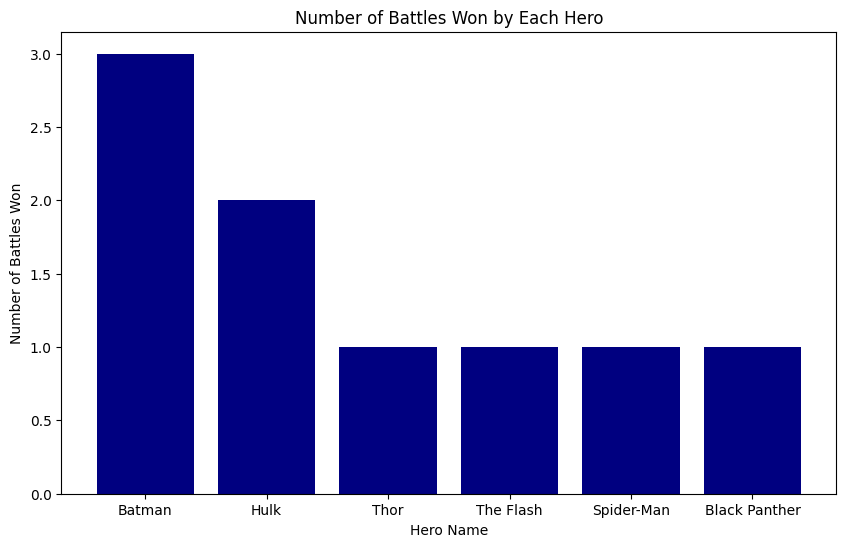

In [82]:
import matplotlib.pyplot as plt

df = pd.read_sql_query(
    '''SELECT heroes.name, COUNT(battles.id) FROM heroes
    JOIN battles ON heroes.id = battles.hero_id
    WHERE outcome = 'Hero Wins'
    GROUP BY heroes.name
    ORDER BY COUNT(battles.id) DESC''', connection
)

plt.figure(figsize = (10,6))
plt.bar(df['name'], df['COUNT(battles.id)'], color = 'navy')
plt.xlabel('Hero Name')
plt.ylabel('Number of Battles Won')
plt.title('Number of Battles Won by Each Hero')
plt.show()

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!